## Q5 Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [3]:
num = 30
# X1_range = np.linspace(0,10,num)
# X2_range = np.linspace(0,10,num)
# X1, X2 = np.meshgrid(X1_range, X2_range)
# Y = X1 + 2*X2 - 1
# X1 = X1 + np.random.randn(num, num) / 2
# X2 = X2 + np.random.randn(num, num) / 2
# Y = Y + np.random.randn(num, num) / 2

# fig = plt.figure(figsize = (6, 6))
# ax = Axes3D(fig, elev = -150, azim = 130)
# ax.scatter(X1, X2, Y)
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()
# X_and_Y = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1), Y.reshape(-1,1)))
# np.save('q4-gradient-descent.npy', X_and_Y)

In [7]:
X_and_Y = np.load('./gradient-descent.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

(900,) (900,) (900,)


### Original Data

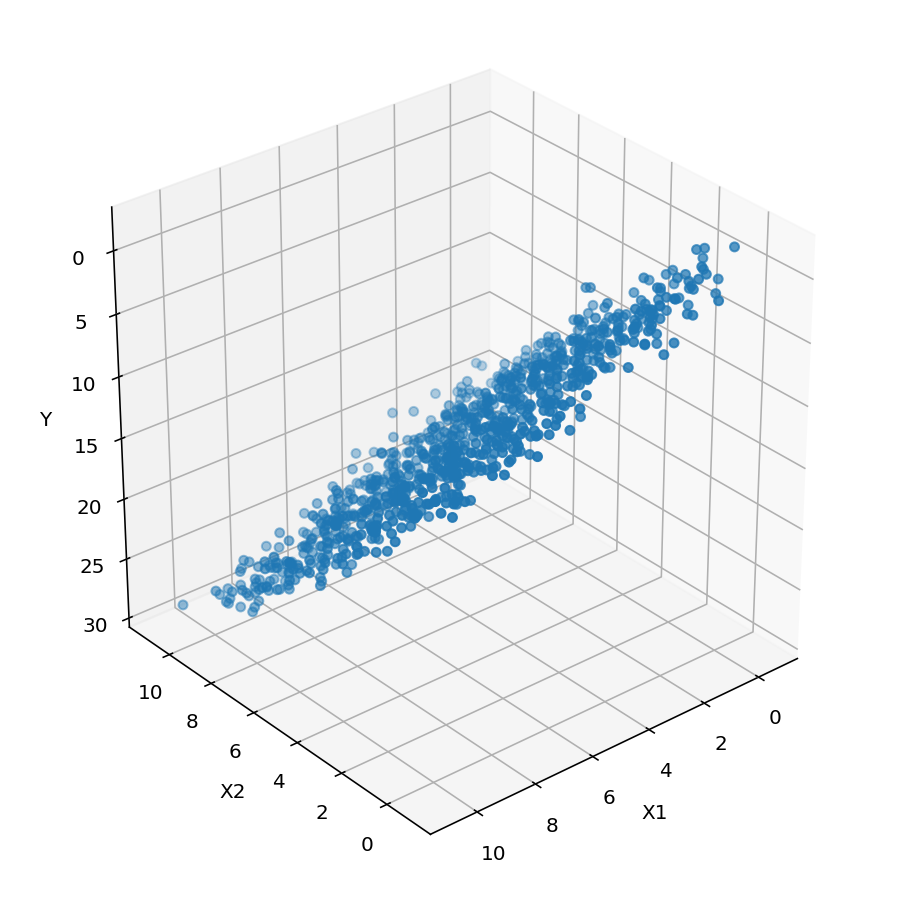

In [5]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Linear Regression Using the Closed Form

In [29]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X

X = np.vstack((np.ones(900), X1, X2)).T


W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = -0.70 + 0.98*X1 + 1.94*X2


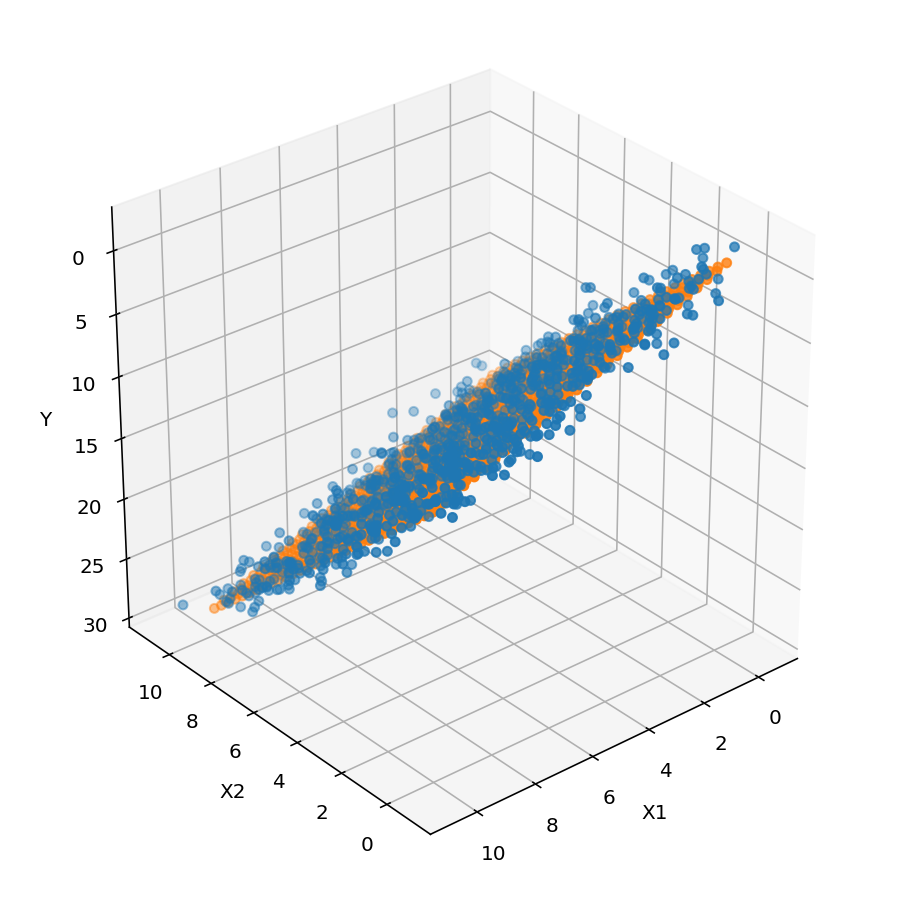

In [30]:
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Gradient Descent

In [11]:
# g'(W)
def g_prime_W(X, Y, W):
    return 2 * X.T.dot(X).dot(W) - 2 * X.T.dot(Y)

In [37]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)

print(X.shape, Y.shape, W.shape)

#lr = 0.000001
lr = 0.000005

#while True:
for i in range(10000):
    grad = g_prime_W(X, Y, W)
    W_new = W - lr * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

(900, 3) (900, 1) (3, 1)
3669
Y = -0.69 + 0.98*X1 + 1.94*X2


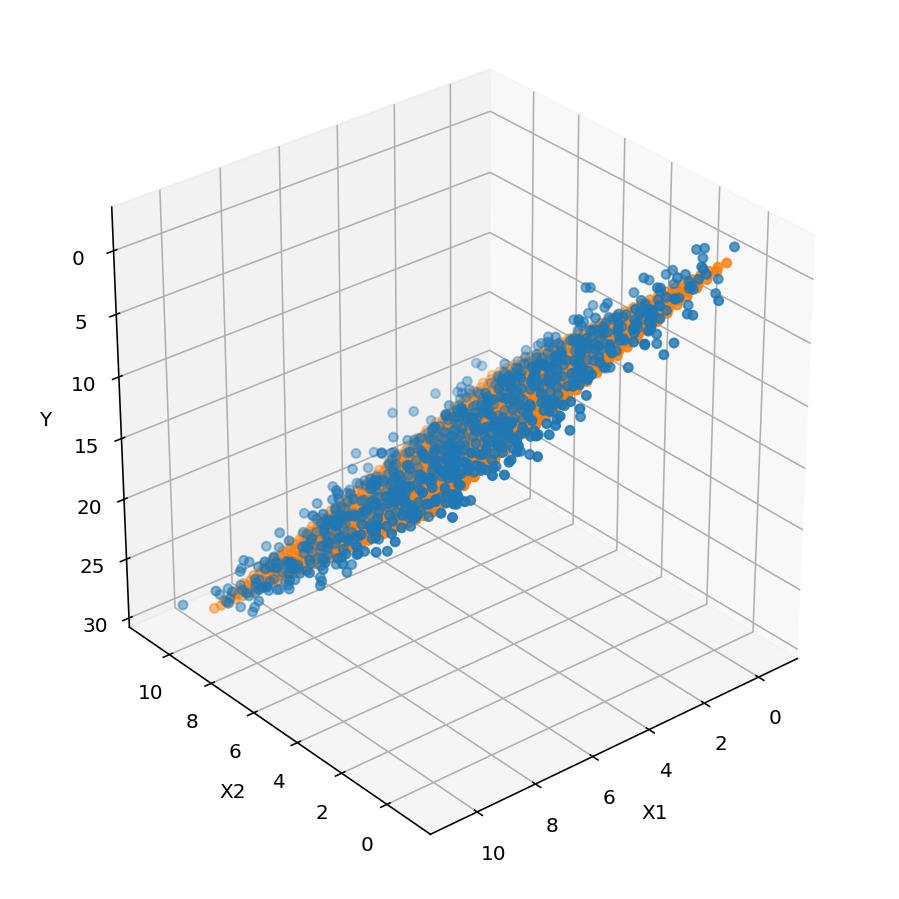

In [38]:
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Q6 Parabola

### Original Data

In [3]:
    X_and_Y = np.load('./parabola.npy')
    X = X_and_Y[:, 0]  # Shape: (300,)
    Y = X_and_Y[:, 1]  # Shape: (300,)

### 1.1 Parabola Estimation with L2 Norm 

In [8]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
X = X_and_Y[:, 0]  # Shape: (300,)
X1 = X
X2 = X ** 2
X = np.vstack((np.ones(300), X1, X2)).T


W = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(Y)

w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))
w0_1, w1_1, w2_1 = w0, w1, w2

Y = 51.07 + -16.06*X1 + 2.36*X2


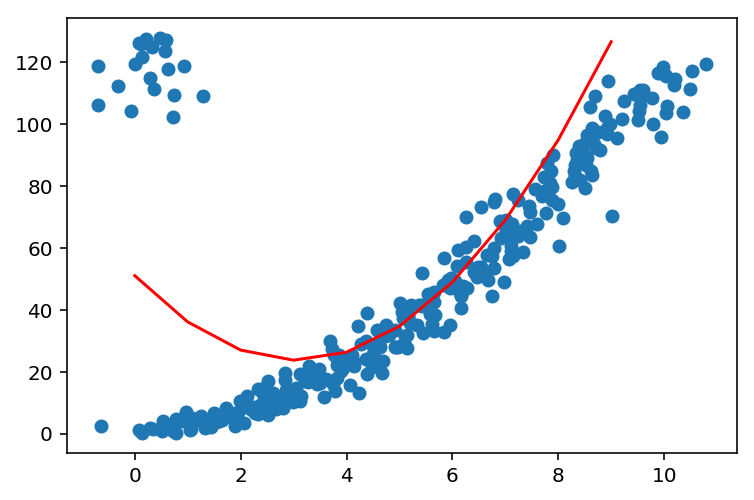

In [7]:
plt.scatter(X1, Y)
x = np.linspace(0,10,10)
y = w0 + w1 * x + w2 * (x ** 2)
plt.plot(y, color='r')
plt.show()

### 1.2 Parabola Estimation with L1 Norm (Gradient Descent)

In [6]:
def get_grad(X, Y, W):
    return np.sign(X.dot(W) - Y).T.dot(X).T

(300, 3) (300, 1) (3, 1)
41383
Y = 1.07 + 1.43*X1 + 1.03*X2


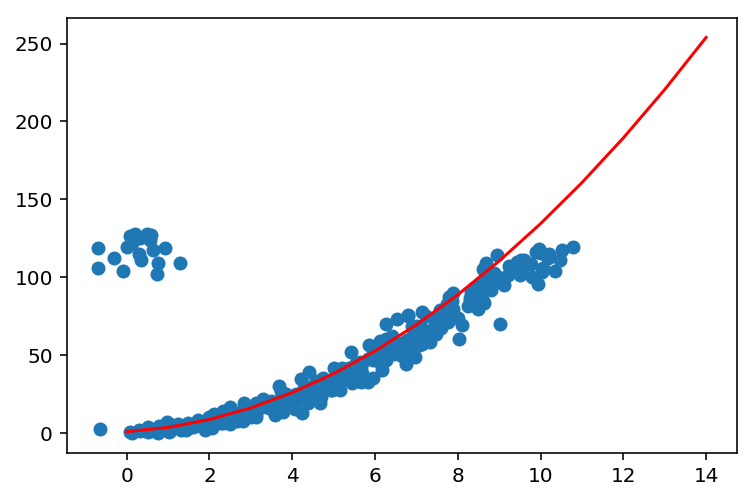

In [7]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)

print(X.shape, Y.shape, W.shape)

lr =  0.000001

#while True:
for i in range(300000):
    grad = get_grad(X, Y, W)
    W_new = W - lr * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))
plt.scatter(X1, Y)
x = np.linspace(0,15,15)
y = w0 + w1 * x + w2 * (x ** 2)
plt.plot(y, color='r')
plt.show()
w0_2, w1_2, w2_2 = w0, w1, w2

### 1.3 Parabola Estimation with L1 and L2 Norm (Gradient Descent)

In [9]:
def grad_desc(X, X1, Y, alpha): 
    # Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
    W = np.matrix(np.zeros((3,1)))
    Y = Y.reshape(-1, 1)

    print(X.shape, Y.shape, W.shape)

    lr = 0.000001

    #while True:
    for i in range(300000):
        grad = alpha * g_prime_W(X, Y, W) + (1 - alpha) * get_grad(X, Y, W)
        W_new = W - lr * grad
        if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
            print(i)
            break
        W = W_new

    w0, w1, w2 = np.array(W).reshape(-1)
    print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))
    plt.scatter(X1, Y)
    x = np.linspace(0,15,15)
    y = w0 + w1 * x + w2 * (x ** 2)
    plt.plot(y, color='r')
    plt.title("Alpha = " + str(alpha))
    plt.show()
    return w0, w1, w2

(300, 3) (300, 1) (3, 1)
236048
Y = 49.81 + -15.58*X1 + 2.33*X2


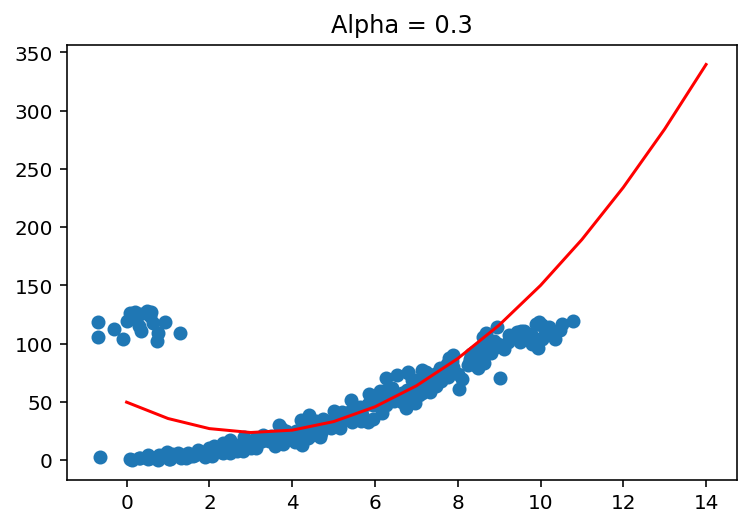

In [12]:
w0_31, w1_31, w2_31 = grad_desc(X, X1, Y, 0.3)

(300, 3) (300, 1) (3, 1)
157048
Y = 50.47 + -15.83*X1 + 2.34*X2


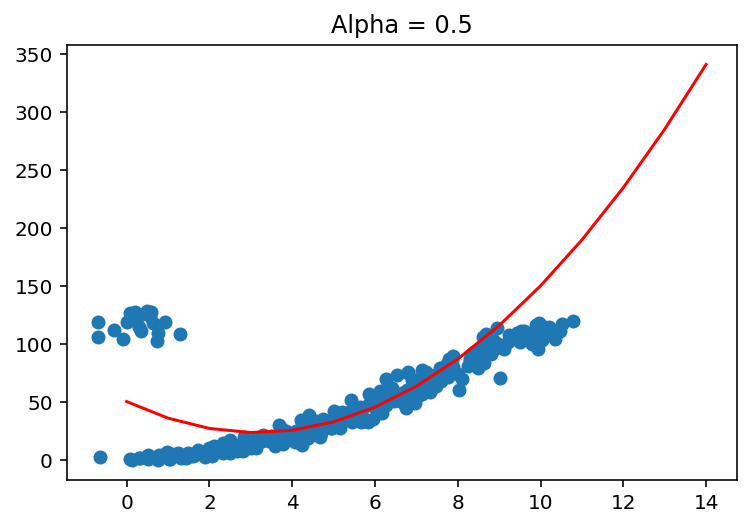

In [13]:
w0_32, w1_32, w2_32 = grad_desc(X, X1, Y, 0.5)

(300, 3) (300, 1) (3, 1)
119444
Y = 50.75 + -15.94*X1 + 2.35*X2


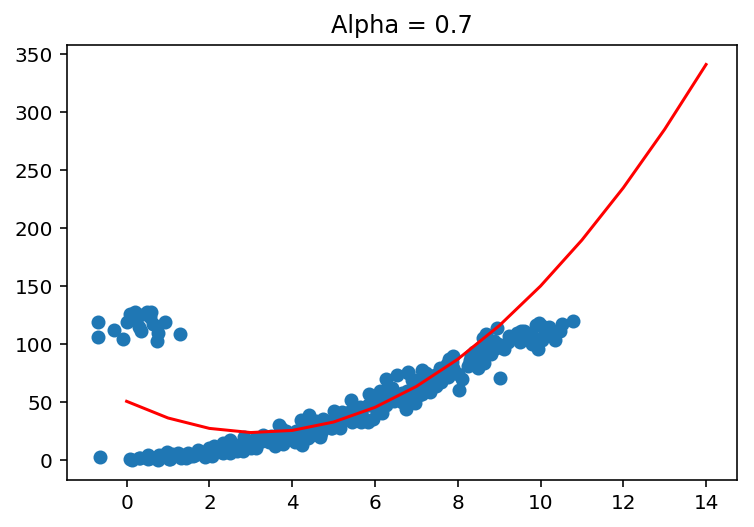

In [14]:
w0_33, w1_33, w2_33 = grad_desc(X, X1, Y, 0.7)

### 1.4 Comparison (Visualization)

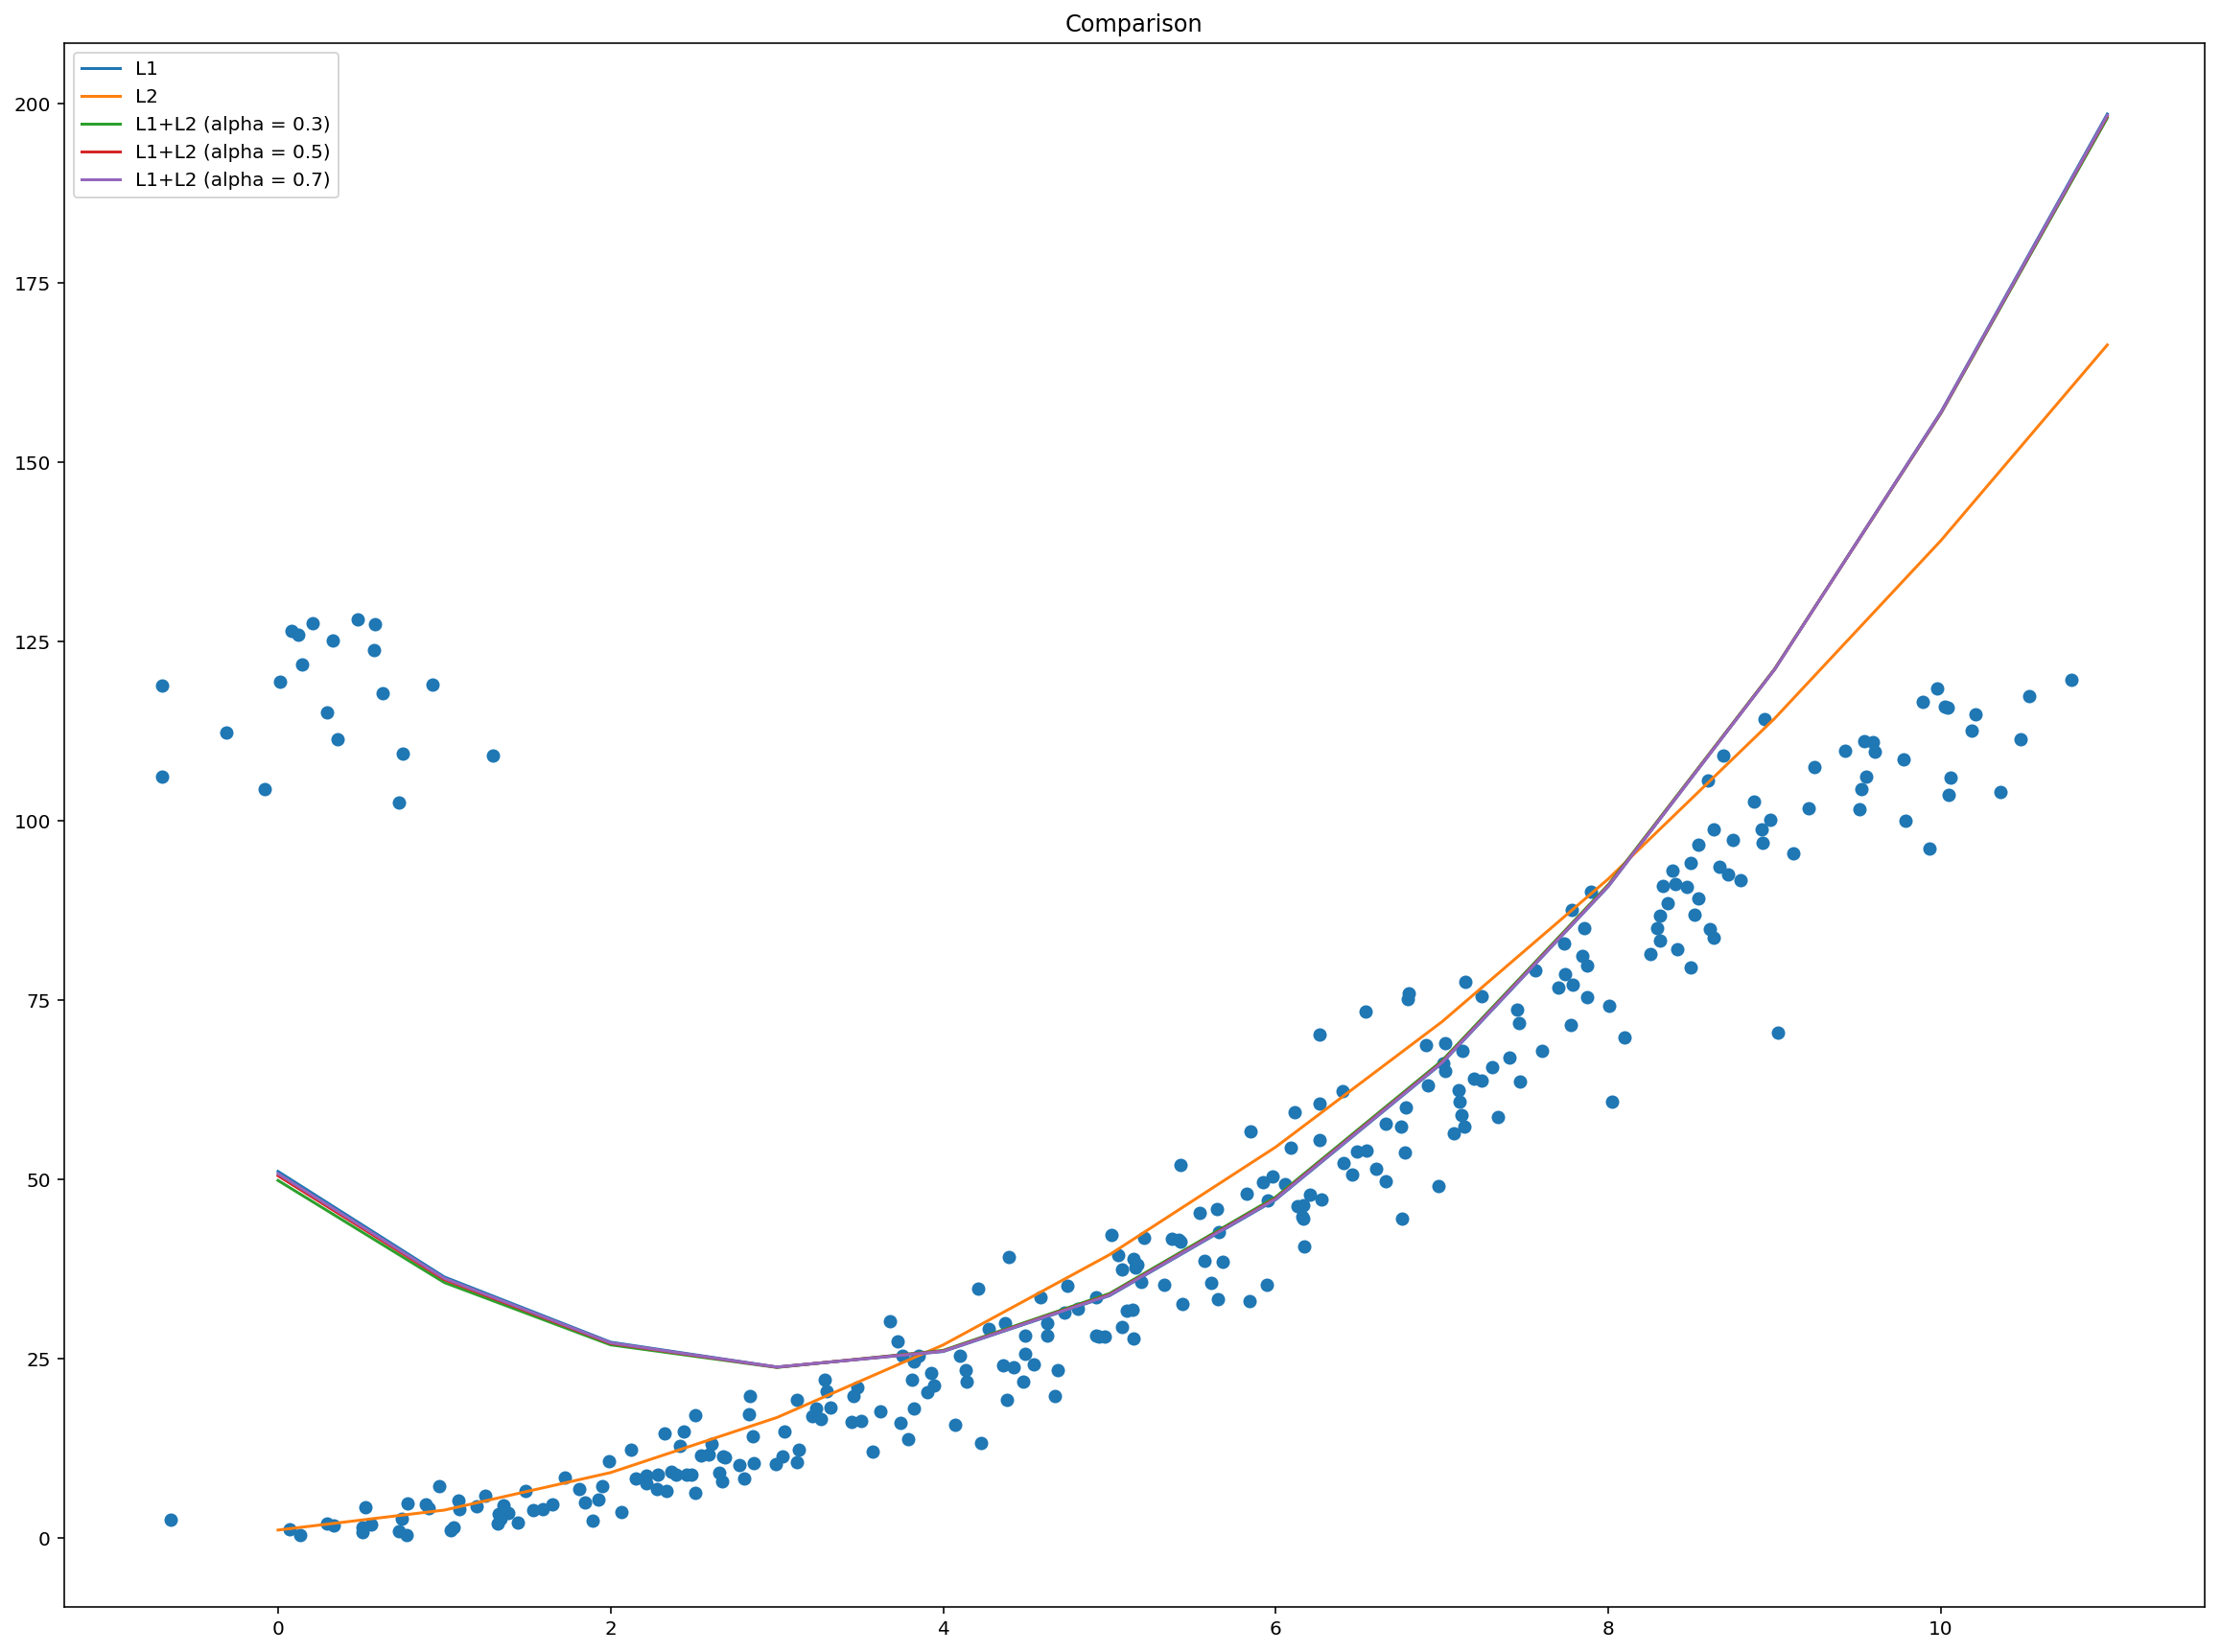

In [33]:
plt.scatter(X1, Y)
x = np.linspace(0,12,12)
y_1 = w0_1 + w1_1 * x + w2_1 * (x ** 2)
y_2 = w0_2 + w1_2 * x + w2_2 * (x ** 2)
y_31 = w0_31 + w1_31 * x + w2_31 * (x ** 2)
y_32 = w0_32 + w1_32 * x + w2_32 * (x ** 2)
y_33 = w0_33 + w1_33 * x + w2_33 * (x ** 2)
plt.plot(y_1)
plt.plot(y_2)
plt.plot(y_31)
plt.plot(y_32)
plt.plot(y_33)
plt.legend(['L1', 'L2', 'L1+L2 (alpha = 0.3)', 'L1+L2 (alpha = 0.5)', 'L1+L2 (alpha = 0.7)'], loc='upper left')
plt.title("Comparison")
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

L2 lines have upward curve at the beginning because they are more sensitive to the outliers we see in the graph than the L1 lines are. Because there is a set of outliers on the upper-left part of the graph so the left end of the lines that use L2 turn upward. L2 and L1+L2 lines are similarly shaped, follow the data the same way, and have similar values for W which is likely due to the similr way they take into account the outliers.